# Figure 2
___

In [1]:
import os
import pandas as pd
import numpy as np

import scanpy as sc
import squidpy as sq


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import colors

# from Scrublet
def darken_cmap(cmap, scale_factor):
    cdat = np.zeros((cmap.N, 4))
    for ii in range(cdat.shape[0]):
        curcol = cmap(ii)
        cdat[ii,0] = curcol[0] * scale_factor
        cdat[ii,1] = curcol[1] * scale_factor
        cdat[ii,2] = curcol[2] * scale_factor
        cdat[ii,3] = 1
    cmap = cmap.from_list(cmap.N, cdat)
    return cmap
cmaps = darken_cmap(plt.cm.Reds, 0.9)

bone_reversed = plt.cm.get_cmap('bone_r')

In [5]:
parent = '/prj/Florian_Leuschner_spatial/analysis/Nanopore/' # change this path!

# Illumina and Nanopore results 
# use local objects, we'll copy them to the repository in due time/provide them as supplement

illumina = sc.read_h5ad('/prj/Florian_Leuschner_spatial/analysis/Illumina/data/anatomical_regions_and_cell_props_bbknn.h5ad')
illumina
nanopore = sc.read_h5ad('/prj/Florian_Leuschner_spatial/analysis/Nanopore/Nanopore/data/anatomical_regions_and_cell_props_scnast.h5ad')
nanopore

AnnData object with n_obs × n_vars = 7616 × 12590
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_transcripts', 'pct_mt', 'library_id', 'anatomical_region', 'nanopore_only', 'C_scANVI'
    var: 'feature_types', 'genome', 'qry_id', 'ref_id', 'qry_gene_id', 'ref_gene_id', 'ref_gene_name', 'class_code', 'n_cells-A', 'n_cells-B', 'n_cells-C', 'n_cells-D'
    uns: 'C_scANVI_colors', 'anatomical_region_colors', 'hvg', 'library_id_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scANVI', 'X_umap', 'deconvolution', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

100%|██████████| 1000/1000 [00:00<00:00, 4063.57/s]
/home/eboileau/.virtualenvs/squidpy/lib/python3.9/site-packages/squidpy/pl/_graph.py:239: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad = AnnData(X=array, obs={cluster_key: pd.Categorical(adata.obs[cluster_key].cat.categories)})
100%|██████████| 1000/1000 [00:00<00:00, 4002.32/s]
/home/eboileau/.virtualenvs/squidpy/lib/python3.9/site-packages/squidpy/pl/_graph.py:239: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad = AnnData(X=array, obs={cluster_key: pd.Categorical(adata.obs[cluster_key].cat.categories)})
100%|██████████| 1000/

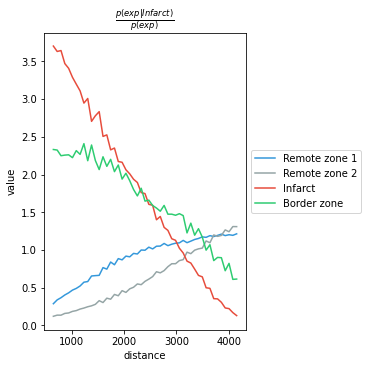

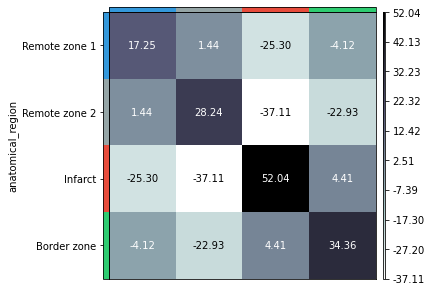

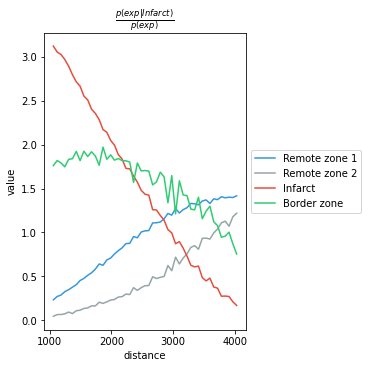

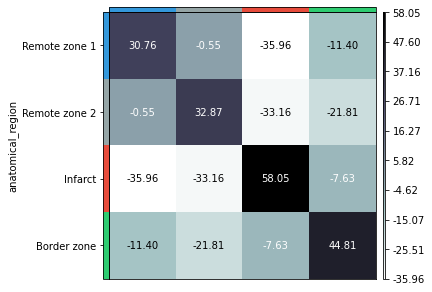

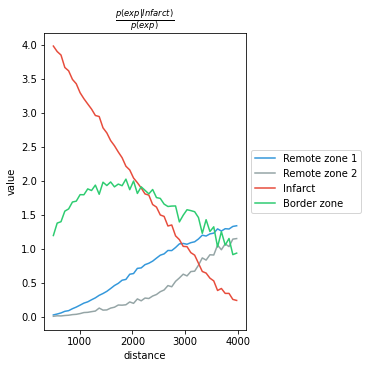

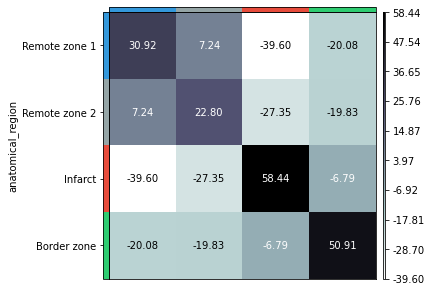

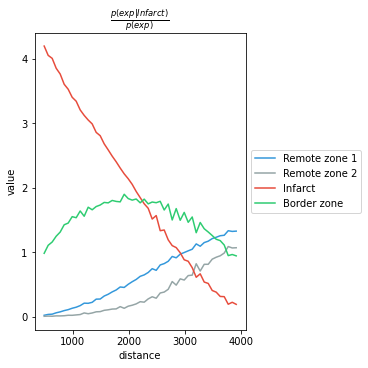

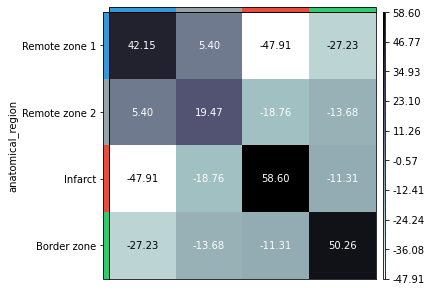

In [6]:
for library in ['A', 'B', 'C', 'D']:
    adata = nanopore[nanopore.obs.library_id == library, :].copy()
    sq.gr.co_occurrence(adata, cluster_key="anatomical_region")
    filen = os.path.join(parent, 'ScNaST', 'paper', 'figures', '2', f'cooccurance-{library}.svg')
    sq.pl.co_occurrence(adata, cluster_key="anatomical_region", clusters="Infarct", save=filen)
    sq.gr.spatial_neighbors(adata)
    sq.gr.nhood_enrichment(adata, cluster_key="anatomical_region")
    filen = os.path.join(parent, 'ScNaST', 'paper', 'figures', '2', f'nhoodenrichment-{library}.svg')
    sq.pl.nhood_enrichment(adata, cluster_key="anatomical_region", cmap=bone_reversed, title='', annotate=True, figsize=(4,4), save=filen)
    

### For remaining panels (sub-figures), see analysis notebooks: *visium_illumina_bbknn.ipynb* and *visium_nanopore.ipynb*